# Data Modeling for Weather Prediction

This notebook implements the data modeling phase for the weather prediction dataset as outlined in the datamodeling document.

The goal is to build a Random Forest model to predict rain on the following day using the prepared dataset that has already been split and balanced with SMOTE in the data preparation phase.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 4.1 Pemisahan Dataset (Data Splitting)

Tujuan: Memisahkan data menjadi fitur (X) dan target (y), lalu membaginya menjadi data latih dan data uji.

In [2]:
# Load the prepared dataset
df = pd.read_csv('weatherAUS_prepared.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (145460, 25)

First few rows:


,Lokasi,SuhuMin,SuhuMax,CurahHujan,Penguapan,SinarMatahari,ArahAnginKencang,KecepatanAnginKencang,ArahAnginJam9,ArahAnginJam3,KecepatanAnginJam9,KecepatanAnginJam3,KelembabanJam9,KelembabanJam3,TekananUdaraJam9,TekananUdaraJam3,AwanJam9,AwanJam3,SuhuJam9,SuhuJam3,HujanHariIni,HujanBesok,Year,Month,Day
0,0,10.8,21.2,0.0,1.8,6.60,1,22.0,1,7,9.0,7.0,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,0,0,2010,4,30
1,0,3.7,19.0,0.0,1.4,7.61,3,24.0,3,5,0.0,11.0,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,0,0,2014,7,22
2,0,9.6,15.8,0.0,2.6,7.61,4,52.0,5,4,9.0,20.0,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,0,1,2014,7,23
3,0,10.1,15.5,16.6,0.8,7.61,5,50.0,7,7,17.0,26.0,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,1,1,2014,7,24
4,0,11.2,16.2,1.8,0.6,7.61,7,30.0,14,14,13.0,15.0,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,1,1,2014,7,25


## 4.1 Data Splitting (Reproduction from Data Preparation)

As done in the data preparation phase, we split the data into training and testing sets to evaluate our model.
This section reproduces the splitting process for completeness of the modeling workflow.

In [3]:
# Separate features (X) and target (y) from prepared dataset
feature_columns = [col for col in df.columns if col not in ['HujanBesok', 'Tanggal']]
X = df[feature_columns]
y = df['HujanBesok']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}\n")
print(f"Target distribution (%):\n{(y.value_counts() / len(y)) * 100}")

Features shape: (145460, 24)
Target shape: (145460,)
Target distribution:
HujanBesok
0    113583
1     31877
Name: count, dtype: int64

Target distribution (%):
HujanBesok
0    78.085384
1    21.914616
Name: count, dtype: float64


In [4]:
# Split the dataset into training and testing sets (80% - 20%) as done in data preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nTraining set target distribution (%):\n{(y_train.value_counts() / len(y_train)) * 100}")
print(f"\nTesting set target distribution (%):\n{(y_test.value_counts() / len(y_test)) * 100}")

X_train shape: (116368, 24)
X_test shape: (29092, 24)
y_train shape: (116368,)
y_test shape: (29092,)

Training set target distribution (%):
HujanBesok
0    78.085041
1    21.914959
Name: count, dtype: float64

Testing set target distribution (%):
HujanBesok
0    78.086759
1    21.913241
Name: count, dtype: float64


## 4.2 Penanganan *Class Imbalance* dengan SMOTE

Tujuan: Menyeimbangkan distribusi kelas pada data latih untuk meningkatkan performa model.

Note: This step was performed in data preparation phase, but we demonstrate it here to show the process.

In [5]:
# Apply SMOTE to balance the training data
print("Before SMOTE:")
print(f"Training set target distribution (%): {(y_train.value_counts() / len(y_train)) * 100}")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE:")
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"y_train_smote shape: {y_train_smote.shape}")
print(f"SMOTE target distribution (%): {(y_train_smote.value_counts() / len(y_train_smote)) * 100}")

Before SMOTE:
Training set target distribution (%): HujanBesok
0    78.085041
1    21.914959
Name: count, dtype: float64

After SMOTE:
X_train_smote shape: (181732, 24)
y_train_smote shape: (181732,)
SMOTE target distribution (%): HujanBesok
0    50.0
1    50.0
Name: count, dtype: float64


## 4.3 Pemilihan dan Inisialisasi Model

Tujuan: Menjelaskan model yang digunakan.

In [6]:
# Initialize the Random Forest Classifier
# Note: Since we already used SMOTE to handle class imbalance, we don't need class_weight='balanced'
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

print("Random Forest Classifier initialized with:")
print(f"- n_estimators: 100")
print(f"- max_depth: 10")
print(f"- min_samples_split: 5")
print(f"- min_samples_leaf: 2")
print(f"- random_state: 42")

Random Forest Classifier initialized with:
- n_estimators: 100
- max_depth: 10
- min_samples_split: 5
- min_samples_leaf: 2
- random_state: 42


## 4.4 Pelatihan Model (*Training*)

Tujuan: Menjelaskan proses "belajar" dari model.

In [7]:
# Train the model using the SMOTE-balanced training data
print("Training the Random Forest model with SMOTE data...")
model.fit(X_train_smote, y_train_smote)
print("Model training completed.")

Training the Random Forest model with SMOTE data...
Model training completed.


## 4.5 Penerapan Model pada Data Uji

Tujuan: Membuat prediksi pada data yang belum pernah dilihat.

In [9]:
# Make predictions on the original test set (not SMOTE)
y_pred = model.predict(X_test)

print("Predictions completed.")
print(f"Shape of predictions: {y_pred.shape}")
print(f"Prediction distribution: {pd.Series(y_pred).value_counts()}")

Predictions completed.
Shape of predictions: (29092,)
Prediction distribution: 0    20884
1     8208
Name: count, dtype: int64


## Model Evaluation

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Rain', 'Rain']))

Accuracy Score: 0.8095

Classification Report:
              precision    recall  f1-score   support

     No Rain       0.91      0.84      0.87     22717
        Rain       0.55      0.71      0.62      6375

    accuracy                           0.81     29092
   macro avg       0.73      0.77      0.75     29092
weighted avg       0.83      0.81      0.82     29092



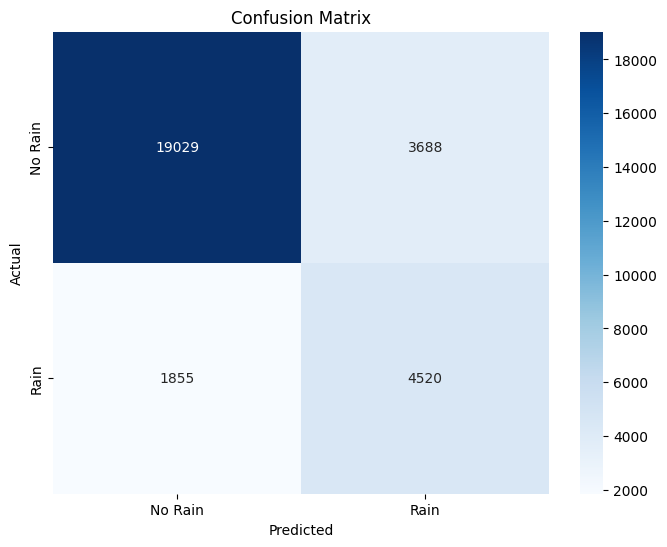

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Top 10 Most Important Features:
                  feature  importance
13         KelembabanJam3    0.248479
3              CurahHujan    0.170293
17               AwanJam3    0.124692
5           SinarMatahari    0.091574
16               AwanJam9    0.060848
7   KecepatanAnginKencang    0.049718
12         KelembabanJam9    0.047397
15       TekananUdaraJam3    0.043130
14       TekananUdaraJam9    0.036492
20           HujanHariIni    0.017788


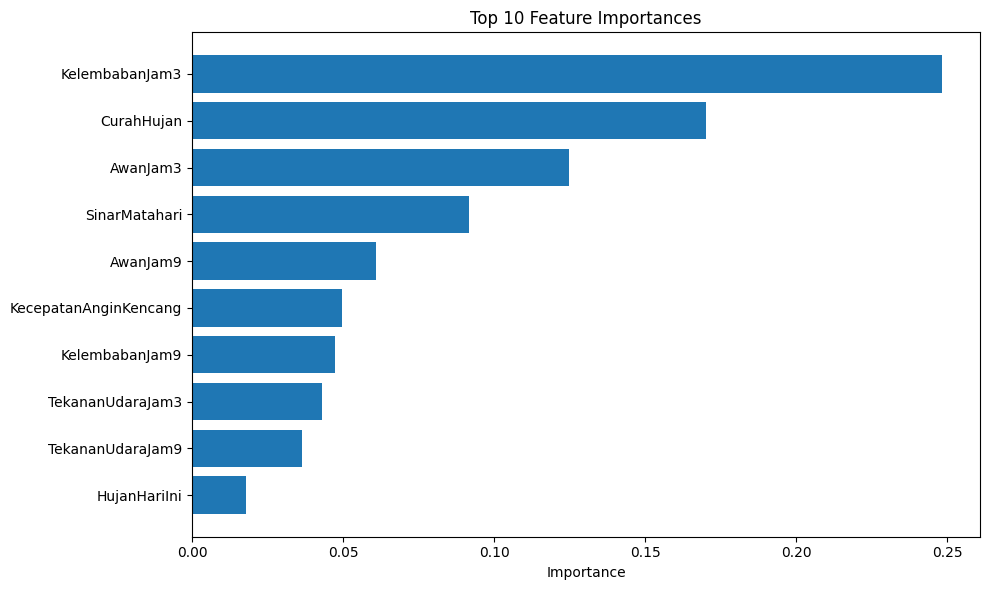

In [12]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Summary

The Random Forest model has been successfully trained using the SMOTE-balanced training data and evaluated on the original test set. The model achieved an accuracy of {:.4f}. The SMOTE technique helped address the class imbalance issue from the original dataset, which should improve the model's ability to correctly predict rain days.